# Deutsch's Algorithm

You are given an unknown balanced $f$ which is either constant or balanced. Determine if the function is constant or balanced. 


<img src="Image/img_1.png" width=600 />


The measure is $1$ with a probability of $1$ if the function is balanced and  is $0$ with a probability of $1$ if the function is constant. 

Let's consider the case in wich $n = 2$


### Constant Function

Consider the constant function: 
$$
f(00)=1,$$ $$
f(01)=1,$$ $$
f(10)=1,$$ $$
f(11)=1
$$

Try to implement the algorith:


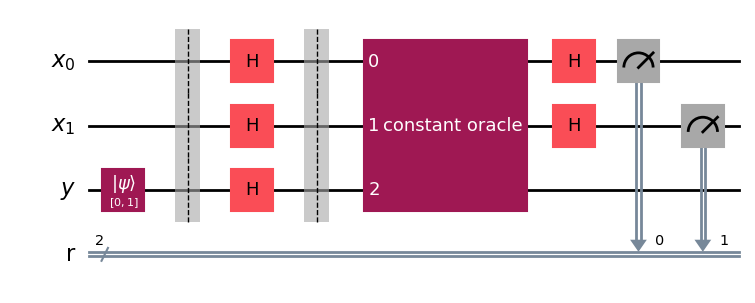

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector


def constant_oracle():
    oracle = QuantumCircuit(3, name = 'constant oracle')
    oracle.x(2)
    return oracle


x = QuantumRegister(2, name='x')
y = QuantumRegister(1, name='y')
r = ClassicalRegister(2, name='r')
circ_const = QuantumCircuit(x,y,r)
one = Statevector([0,1])
circ_const.initialize(one, y)

# circ_const.x(y)
circ_const.barrier()

circ_const.h(x[0])
circ_const.h(x[1])
circ_const.h(y)

circ_const.barrier()


circ_const.append(constant_oracle(),[x[0],x[1],y])

circ_const.h(x[0])
circ_const.h(x[1])

circ_const.measure(x[0],r[0])
circ_const.measure(x[1],r[1])


circ_const.draw('mpl')
    

{'00': 1024}


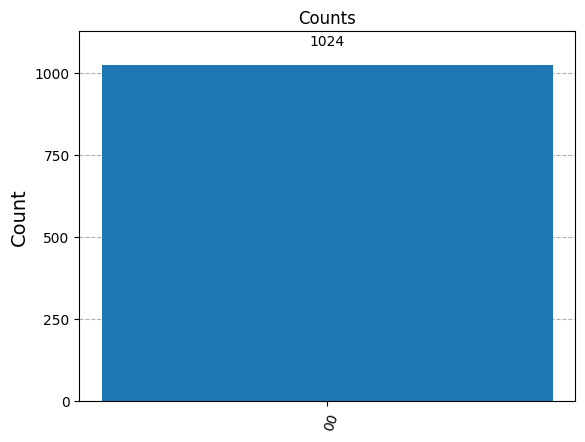

In [18]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


simulator = AerSimulator()
circ = transpile(circ_const, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Counts')

### Balance Function

Consider the constant function: 
$$
f(00)=1,
$$ $$
f(01)=0,
$$ $$
f(10)=0, 
$$ $$
f(11)=1
$$

Try to implement the algorith:


                         ░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐┌─┐   
x_0: ────────────────────░─┤ H ├─░─┤0         ├─░─┤ H ├┤M├───
                         ░ ├───┤ ░ │          │ ░ ├───┤└╥┘┌─┐
x_1: ────────────────────░─┤ H ├─░─┤1  oracle ├─░─┤ H ├─╫─┤M├
     ┌─────────────────┐ ░ ├───┤ ░ │          │ ░ └───┘ ║ └╥┘
  y: ┤ Initialize(0,1) ├─░─┤ H ├─░─┤2         ├─░───────╫──╫─
     └─────────────────┘ ░ └───┘ ░ └──────────┘ ░       ║  ║ 
r: 2/═══════════════════════════════════════════════════╩══╩═
                                                        0  1 
{'11': 1024}


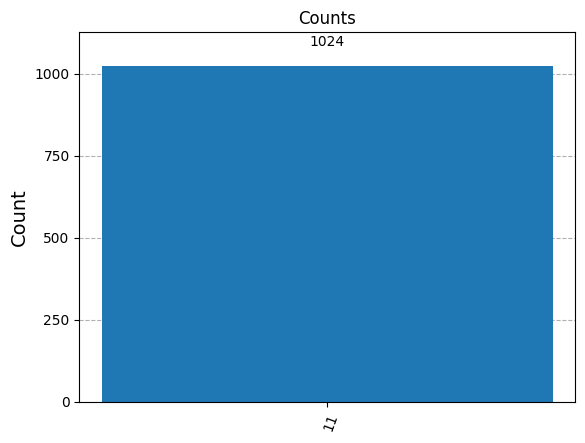

In [29]:

def oracle():
    oracle = QuantumCircuit(3, name = ' oracle')
    oracle.cx(0,2)
    oracle.cx(1,2)
    oracle.x(2)
    return oracle


x = QuantumRegister(2, name='x')
y = QuantumRegister(1, name='y')
r = ClassicalRegister(2, name='r')
circ_const = QuantumCircuit(x,y,r)
one = Statevector([0,1])
circ_const.initialize(one, y)

# circ_const.x(y)
circ_const.barrier()


circ_const.h(x[0])
circ_const.h(x[1])
circ_const.h(y)

circ_const.barrier()


circ_const.append(oracle(),[x[0],x[1],y])

circ_const.barrier()
circ_const.h(x[0])
circ_const.h(x[1])

circ_const.measure(x[0],r[0])
circ_const.measure(x[1],r[1])


print(circ_const.draw())


simulator = AerSimulator()
circ = transpile(circ_const, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Counts')